In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
%matplotlib inline

# Data Gathering

In [3]:
df=pd.read_csv(r"Student_Performance.csv")

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.shape

(10000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [8]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [9]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# Data Pre-processing

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(9873, 6)

In [13]:
df['Extracurricular Activities']=df['Extracurricular Activities'].map({'Yes':1,'No':0})

In [14]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   int64  
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 539.9 KB


In [16]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


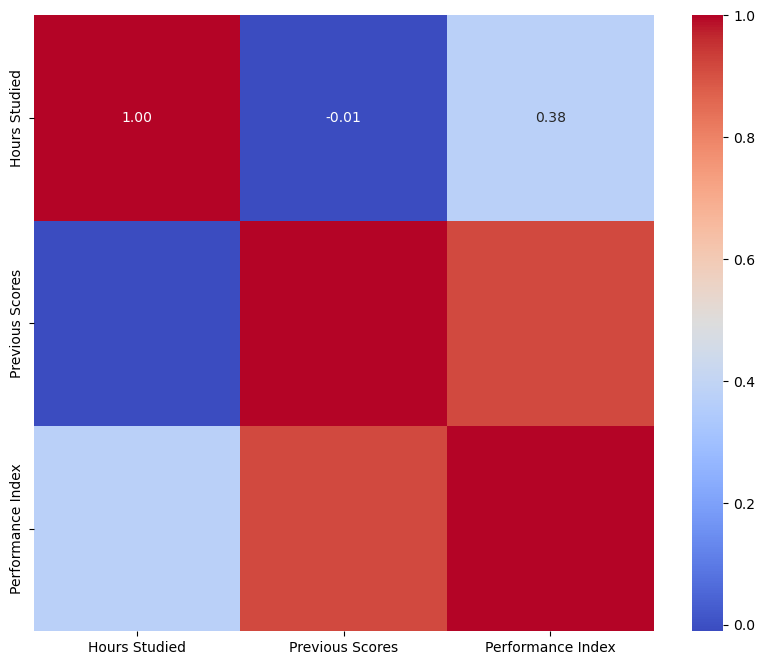

In [95]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',fmt='.2f',annot_kws={"size": 10}) ## different different cmap have crest and coolwarm
plt.show()

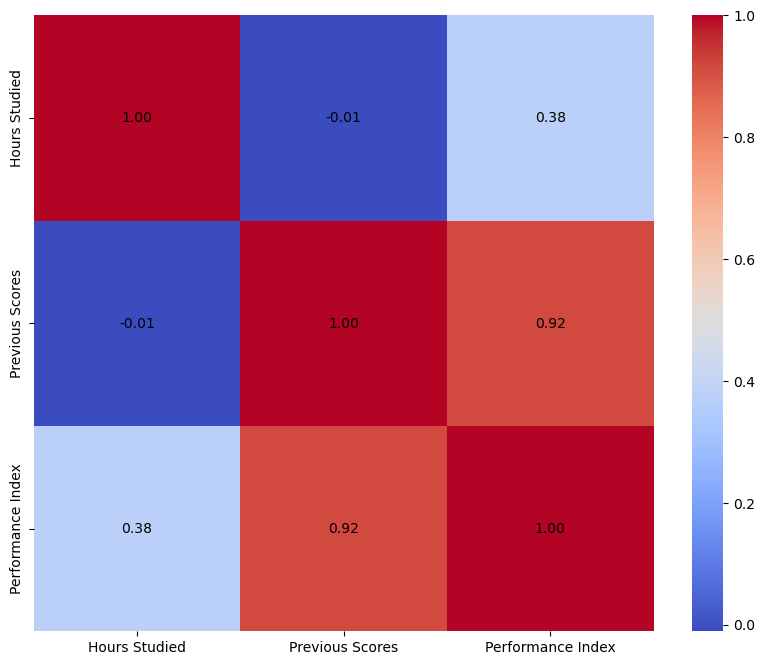

In [97]:
corr = df.corr()
plt.figure(figsize=(10, 8))  # Adjust the size of the heatmap
sns.heatmap(corr, cmap='coolwarm')

for i in range(len(corr)):
    for j in range(len(corr.columns)):
        plt.text(j+0.5, i+0.5, '{:.2f}'.format(corr.iloc[i, j]), ha='center', va='center', color='black')

plt.show()

In [18]:
# Extracurricular Activities
# Sleep Hours	
# Sample Question Papers Practiced	

# this three features not most correlated with our dependent variable so we remove

In [20]:
df.drop(columns=['Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced'],inplace=True)

In [21]:
df.head()

,Hours Studied,Previous Scores,Performance Index
0,7,99,91.0
1,4,82,65.0
2,8,51,45.0
3,5,52,36.0
4,7,75,66.0


In [22]:
df.corr()

,Hours Studied,Previous Scores,Performance Index
Hours Studied,1.000000,-0.010676,0.375332
Previous Scores,-0.010676,1.000000,0.915135
Performance Index,0.375332,0.915135,1.000000


C:\Users\Harsh Bhanushali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harsh Bhanushali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harsh Bhanushali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


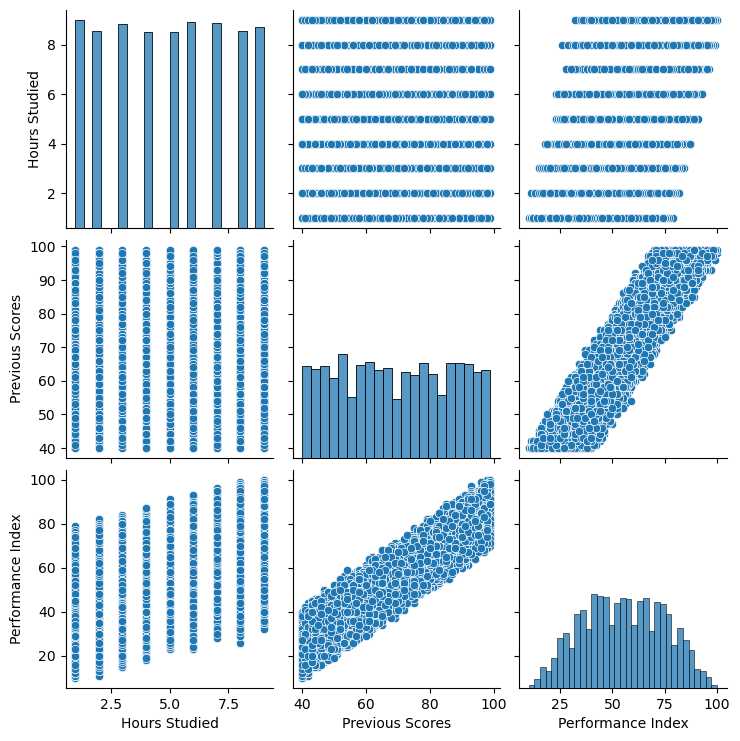

In [23]:
sns.pairplot(df)
plt.show()

In [24]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Performance Index'], dtype='object')

In [25]:
X=df[['Hours Studied','Previous Scores']]
X.head()

,Hours Studied,Previous Scores
0,7,99
1,4,82
2,8,51
3,5,52
4,7,75


In [26]:
y=df['Performance Index']
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [29]:
X_train.head()

,Hours Studied,Previous Scores
7579,2,92
4205,6,54
3878,4,60
4821,9,68
9731,1,53


# now we transform our data 

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()

In [33]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
X_train

array([[-1.15469096,  1.30769323],
       [ 0.39157995, -0.88537394],
       [-0.38155551, -0.53910017],
       ...,
       [ 0.00501222,  1.48083012],
       [-1.54125869, -1.28935999],
       [ 1.55128314,  0.84599488]])

In [35]:
y_train

7579    69.0
4205    42.0
3878    42.0
4821    64.0
9731    26.0
        ... 
5771    22.0
5221    56.0
5424    81.0
860     20.0
7337    82.0
Name: Performance Index, Length: 7404, dtype: float64

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regression=LinearRegression()

In [38]:
regression.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred=regression.predict(X_test)

In [40]:
user_data=regression.predict([[-1.15469096, 1.30769323]])

In [41]:
user_data

array([69.63050226])

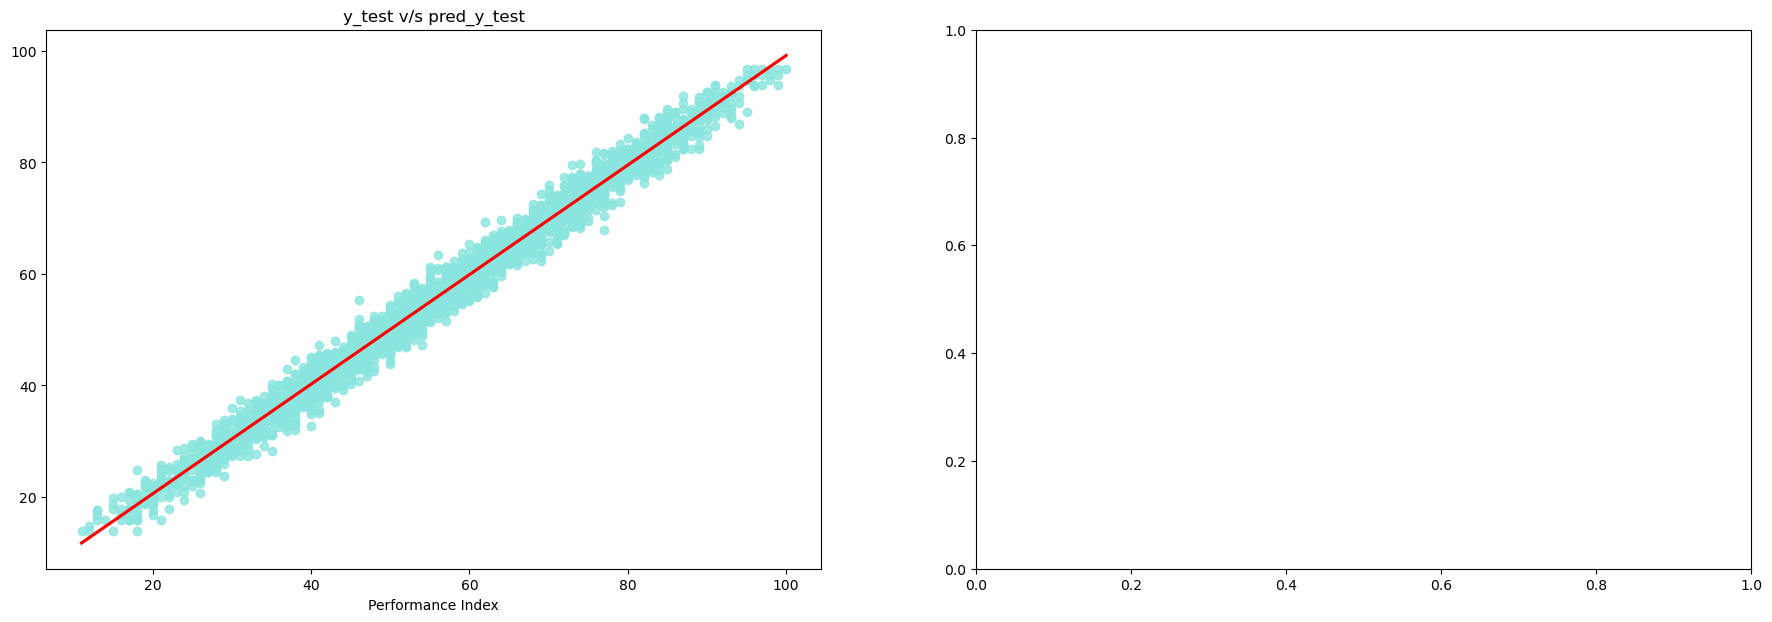

In [42]:
fig,axes=plt.subplots(1,2,figsize=(22,7))
axes[0].set_title('y_test v/s pred_y_test')
sns.regplot(ax=axes[0],x=y_test,y=y_pred,scatter_kws={'color':'#89E5DE'},line_kws={'color':'r'})
# axes[1].set_title('y_train v/s pred_y_train')
# sns.regplot(ax=axes[1],x=y_train,y=y_pred_train,scatter_kws={'color':'#89E5DE'},line_kws={'color':'r'})
plt.show()

In [43]:
r2Score = r2_score(y_test,y_pred)
print('r2 Score = ',round(r2Score,4)*100)
mae_score = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error = ',round(mae_score,4))
rmse_score = np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error = ',round(rmse_score,4))

r2 Score =  98.50999999999999
Mean Absolute Error =  1.8676
Root Mean Squared Error =  2.3485
